Mean Absolute Error Ridge Linear Regression: 0.162829976437694
Mean Absolute Error MLP1: 0.0680414073796843
Mean Absolute Error MLP2: 0.0978071820387748


/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


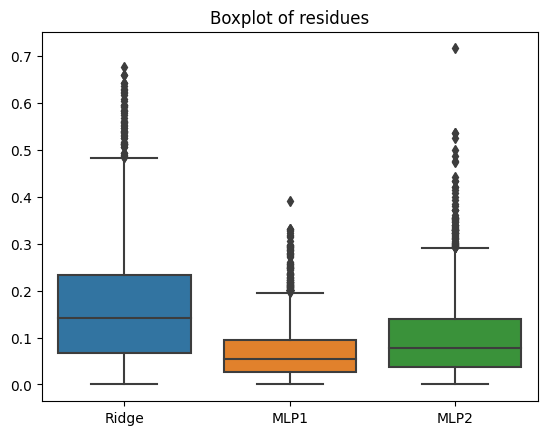

/var/folders/0v/j168s2s91bxf0vr_r7rn3m_c0000gn/T/ipykernel_24822/4134901593.py:66: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residues['Ridge'], hist = True, kde = True, kde_kws = {'linewidth': 3}, label = 'Ridge')
/var/folders/0v/j168s2s91bxf0vr_r7rn3m_c0000gn/T/ipykernel_24822/4134901593.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwasko

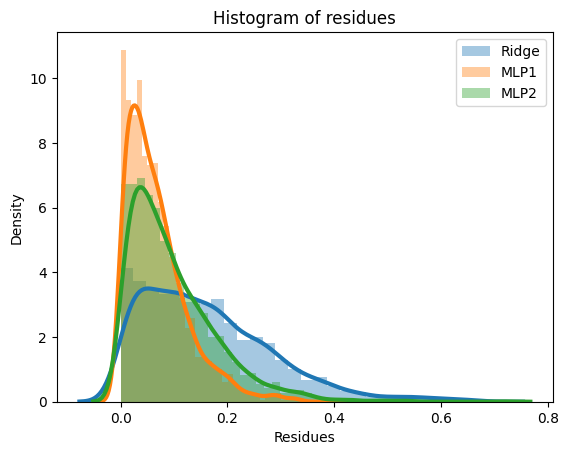

MLP1 iterations: 452
MLP2 iterations: 77
MLP1 converged: True
MLP2 converged: True


In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn import metrics, datasets


#Consider the following three regressors applied on kin8nm.arff data

#Load the data

data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop('y', axis=1)
y = df['y']


#Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Ridge Regression

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred_Ridge = ridge.predict(X_test)
print('Mean Absolute Error Ridge Linear Regression:', metrics.mean_absolute_error(y_test, y_pred))


#MLP1

mlp1 = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'tanh', max_iter = 500, random_state = 0, early_stopping = True)
mlp1.fit(X_train.values, y_train)
y_pred_mlp1 = mlp1.predict(X_test.values)
print('Mean Absolute Error MLP1:', metrics.mean_absolute_error(y_test, y_pred_mlp1))

#MLP2

mlp2 = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'tanh', max_iter=500, random_state = 0, early_stopping = False)
mlp2.fit(X_train.values, y_train)
y_pred_mlp2 = mlp2.predict(X_test.values)
print('Mean Absolute Error MLP2:', metrics.mean_absolute_error(y_test, y_pred_mlp2))

#Plot the residues (in absolute value) using two visualizations: boxplots and histograms.

#Boxplot


residues_Ridge = abs(y_test - y_pred_Ridge)
residues_mlp1 = abs(y_test - y_pred_mlp1)
residues_mlp2 = abs(y_test - y_pred_mlp2)

residues = pd.DataFrame({'Ridge': residues_Ridge, 'MLP1': residues_mlp1, 'MLP2': residues_mlp2})

sns.boxplot(data = residues)
plt.title('Boxplot of residues')
plt.savefig('boxplots.png')
plt.show()

#Histogram

sns.distplot(residues['Ridge'], hist = True, kde = True, kde_kws = {'linewidth': 3}, label = 'Ridge')
sns.distplot(residues['MLP1'], hist = True, kde = True, kde_kws = {'linewidth': 3}, label = 'MLP1')
sns.distplot(residues['MLP2'], hist = True, kde = True, kde_kws = {'linewidth': 3}, label = 'MLP2')
plt.title('Histogram of residues')
plt.legend()
plt.xlabel('Residues')
plt.savefig('histograms.png')
plt.show()


#How many iterations were required for 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2 to converge?

print('MLP1 iterations:', mlp1.n_iter_)
print('MLP2 iterations:', mlp2.n_iter_)
print('MLP1 converged:', mlp1.n_iter_ < mlp1.max_iter)
print('MLP2 converged:', mlp2.n_iter_ < mlp2.max_iter)



